In [1]:
import yaml
import numpy as np
from tools import plot_surface
import matplotlib.pyplot as plt
from Bragg_mirror_sf import *

In [2]:
with open('../input/input.yaml') as f:
    dict = yaml.load(f, Loader=yaml.FullLoader)
    print(dict)

{'crystal': {'theta': 45, 'd': 0.0002}, 'beam': {'sigma_x': 2e-05, 'sigma_y': 2e-05, 'peak_power': 1e-08, 'Eph': 9831.88, 'nx': 100, 'ny': 100, 'npadx': 1000}, 'diode': {'response_curve': {'type': 'function', 'skew_num': 1.0, 'noise_level': 0.1}, 'position': {'d': 1.0, 'x': 0.0, 'y': 0.0, 'radius': 8e-05}}, 'scan': {'range': 0.0001, 'nsample': 100}}


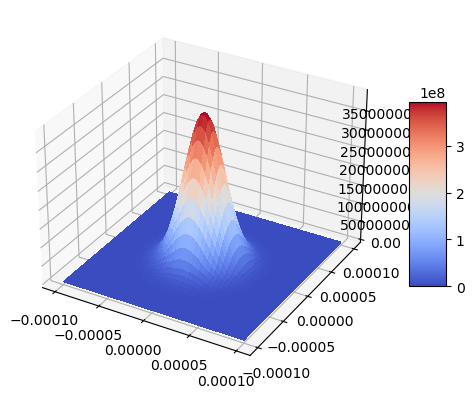

In [3]:
sigma_x = 20.0e-6
sigma_y = 20.0e-6

nx = 100
ny = 100
npadx = 1000

xlamds = 1.26e-10

k = 2*np.pi/xlamds

x = np.linspace(-5*sigma_x, 5*sigma_x, nx)
y = np.linspace(-5*sigma_y, 5*sigma_y, ny)
xmesh, ymesh = np.meshgrid(x, y, indexing = 'ij')

field = 1. / (2. * np.pi * sigma_x * sigma_y) * np.exp(-(xmesh**2. / (2. * sigma_x**2.) + ymesh **2. / (2. * sigma_y**2.)))
plot_surface(x, y ,field)

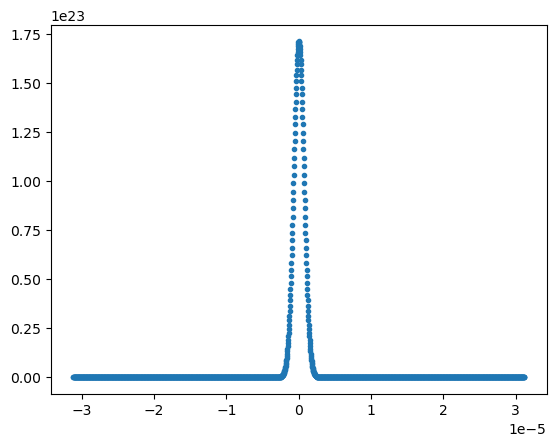

In [4]:
dx = np.mean(np.diff(x))
dy = np.mean(np.diff(y))
Dkx = 2*np.pi/dx
Dky = 2*np.pi/dy
nx_padded = nx + 2*npadx
kx = Dkx/ 2. * np.linspace(-1.,1.,nx_padded)
ky = Dkx/ 2. * np.linspace(-1.,1.,ny)
kx_mesh, ky_mesh = np.meshgrid(kx, ky, indexing = 'ij')
xs = (np.arange(nx_padded) - np.floor(nx_padded/2))*dx
field = np.pad(field, ((npadx, npadx), (0,0)))
fftfld = np.fft.fftshift(np.fft.fft2(field), axes=(0,1))
plt.plot(kx/k, np.sum(np.abs(fftfld)**2, axis = 1), '.')

In [39]:
range = 100e-6
nsample = 1000
theta0 = np.pi/4 + 10e-6
theta = kx/k + theta0
R0H, R00 = get_Bragg_mirror_response_theta(theta = theta, eph_0=9831.88, d=200e-6)


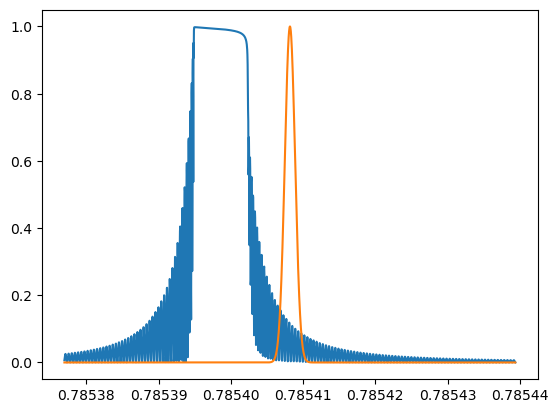

In [40]:
spec = np.sum(np.abs(fftfld)**2, axis = 1)
plt.plot(theta, np.abs(R0H)**2)
plt.plot(theta, spec/np.max(spec))

In [41]:
fftfld_transmit = np.einsum('i,ij->ij',R00, fftfld)

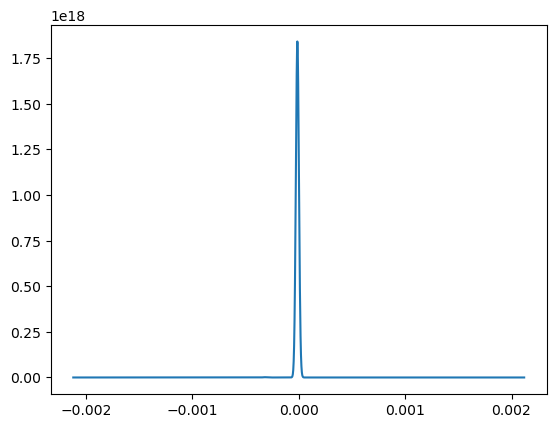

In [46]:
fld_transmit = np.fft.ifft2(np.fft.ifftshift(fftfld_transmit))
#fld_transmit = fld_transmit[npadx:-npadx, :]
plt.plot(xs, np.sum(np.abs(fld_transmit)**2, axis = 1))